In [1]:
!pip install kagglehub pandas scikit-learn shap

In [ ]:
import kagglehub
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [17]:
shap.initjs()

In [3]:
path = kagglehub.dataset_download(
    "rabieelkharoua/predict-online-gaming-behavior-dataset"
)
path

'/home/josugoar/.cache/kagglehub/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/versions/1'

In [4]:
df = pd.read_csv(f"{path}/online_gaming_behavior_dataset.csv")
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [5]:
df = df.dropna()
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [6]:
df = df.drop(labels="PlayerID", axis="columns")
df

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [7]:
encoder = OneHotEncoder(sparse_output=False)
data = encoder.fit_transform(df[["Gender", "Location", "GameGenre"]])
data = pd.DataFrame(
    data, columns=encoder.get_feature_names_out(["Gender", "Location", "GameGenre"])
)
df = df.drop(["Gender", "Location", "GameGenre"], axis="columns")
df = pd.concat([df, data], axis="columns")
df

,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
0,43,16.271119,0,Medium,6,108,79,25,Medium,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,29,5.525961,0,Medium,5,144,11,10,Medium,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,22,8.223755,0,Easy,16,142,35,41,High,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35,5.265351,1,Easy,9,85,57,47,Medium,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,33,15.531945,0,Medium,2,131,95,37,Medium,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,20.619662,0,Easy,4,75,85,14,Medium,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
40030,44,13.539280,0,Hard,19,114,71,27,High,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
40031,15,0.240057,1,Easy,10,176,29,1,High,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
40032,34,14.017818,1,Medium,3,128,70,10,Medium,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
encoder = OrdinalEncoder(
    categories=[["Easy", "Medium", "Hard"], ["Low", "Medium", "High"]]
)
data = encoder.fit_transform(df[["GameDifficulty", "EngagementLevel"]])
df[["GameDifficulty", "EngagementLevel"]] = data
df

,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
0,43,16.271119,0,1.0,6,108,79,25,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,29,5.525961,0,1.0,5,144,11,10,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,22,8.223755,0,0.0,16,142,35,41,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35,5.265351,1,0.0,9,85,57,47,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,33,15.531945,0,1.0,2,131,95,37,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,20.619662,0,0.0,4,75,85,14,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
40030,44,13.539280,0,2.0,19,114,71,27,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
40031,15,0.240057,1,0.0,10,176,29,1,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
40032,34,14.017818,1,1.0,3,128,70,10,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
scaler = StandardScaler()
data = scaler.fit_transform(
    df[
        [
            "Age",
            "PlayTimeHours",
            "SessionsPerWeek",
            "AvgSessionDurationMinutes",
            "AchievementsUnlocked",
        ]
    ]
)
df[
    [
        "Age",
        "PlayTimeHours",
        "SessionsPerWeek",
        "AvgSessionDurationMinutes",
        "AchievementsUnlocked",
    ]
] = data
df

,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
0,1.096023,0.614176,0,1.0,-0.602363,0.269487,79,0.032814,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.297969,-0.939816,0,1.0,-0.775865,1.004019,11,-1.006648,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.994965,-0.549654,0,0.0,1.132666,0.963212,35,1.141573,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.299456,-0.977506,1,0.0,-0.081854,-0.199798,57,1.557358,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.100314,0.507275,0,1.0,-1.296374,0.738771,95,0.864383,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,0.000744,1.243074,0,0.0,-0.949368,-0.403835,85,-0.729458,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
40030,1.195594,0.219091,0,2.0,1.653174,0.391909,71,0.171409,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
40031,-1.691961,-1.704277,1,0.0,0.091649,1.656937,29,-1.630325,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
40032,0.199885,0.288298,1,1.0,-1.122871,0.677560,70,-1.006648,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
data = (df["PlayerLevel"] - 1) / (100 - 1)
df["PlayerLevel"] = data
df

,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
0,1.096023,0.614176,0,1.0,-0.602363,0.269487,0.787879,0.032814,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.297969,-0.939816,0,1.0,-0.775865,1.004019,0.101010,-1.006648,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.994965,-0.549654,0,0.0,1.132666,0.963212,0.343434,1.141573,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.299456,-0.977506,1,0.0,-0.081854,-0.199798,0.565657,1.557358,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.100314,0.507275,0,1.0,-1.296374,0.738771,0.949495,0.864383,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,0.000744,1.243074,0,0.0,-0.949368,-0.403835,0.848485,-0.729458,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
40030,1.195594,0.219091,0,2.0,1.653174,0.391909,0.707071,0.171409,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
40031,-1.691961,-1.704277,1,0.0,0.091649,1.656937,0.282828,-1.630325,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
40032,0.199885,0.288298,1,1.0,-1.122871,0.677560,0.696970,-1.006648,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
y = df["EngagementLevel"]
X = df.drop(["EngagementLevel"], axis="columns")
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test

(            Age  PlayTimeHours  InGamePurchases  GameDifficulty  \
 11608 -1.393248      -0.455137                0             1.0   
 17242  0.797310      -0.677768                1             0.0   
 18561 -0.098827      -0.196248                0             1.0   
 11568  1.295165       1.320904                0             1.0   
 35731  0.199885      -1.574991                0             0.0   
 ...         ...            ...              ...             ...   
 2407   0.896881       1.486774                0             2.0   
 29867 -0.198398       1.565014                1             1.0   
 22333  1.295165       1.323536                0             0.0   
 16515  0.498598      -0.536612                0             0.0   
 23252  1.295165       0.341828                0             1.0   
 
        SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
 11608         0.959163                   0.493927     0.818182   
 17242        -0.602363                  -0.1589

In [12]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.758617244479968

100%|██████████| 10009/10009 [25:07<00:00,  6.64it/s]


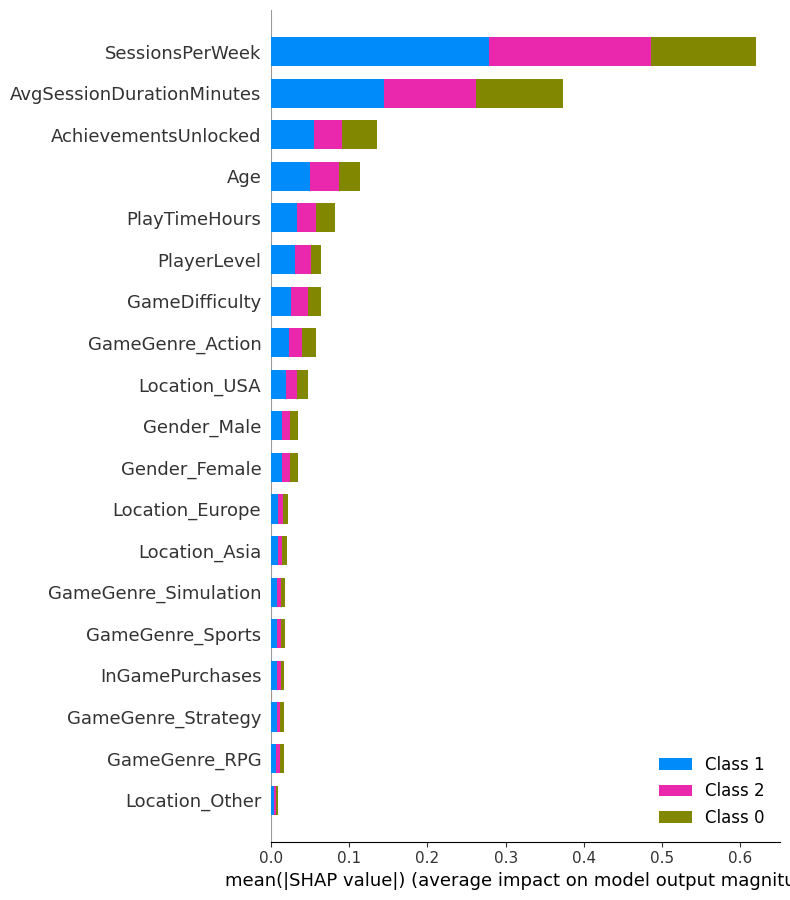

In [13]:
explainer = shap.KernelExplainer(clf.predict_proba, shap.sample(X_train, 1))
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_train.columns)

In [19]:
shap.force_plot(
    explainer.expected_value[0],
    shap_values[0][0, :],
    X_test.iloc[0, :],
    feature_names=X_train.columns,
)

PermutationExplainer explainer: 10010it [21:05,  7.85it/s]                           


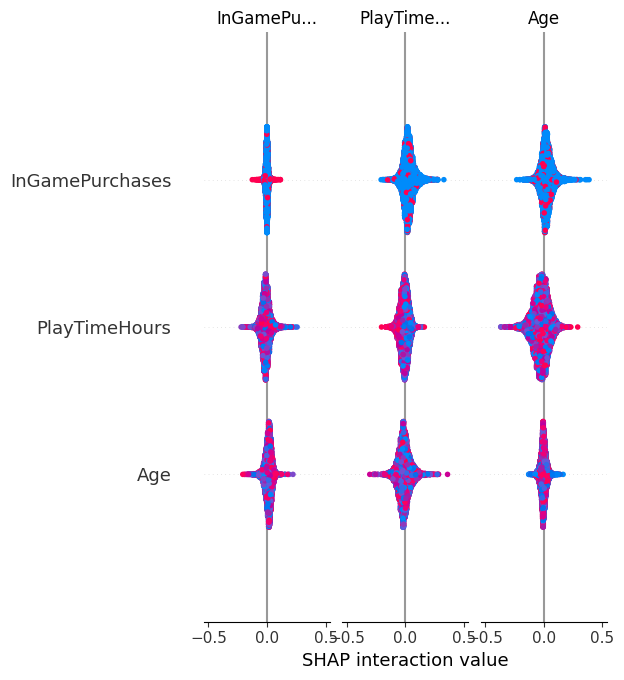

In [20]:
explainer = shap.Explainer(clf.predict_proba, shap.sample(X_train, 10))
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_train.columns)

In [22]:
clf = Perceptron()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.640323708662204

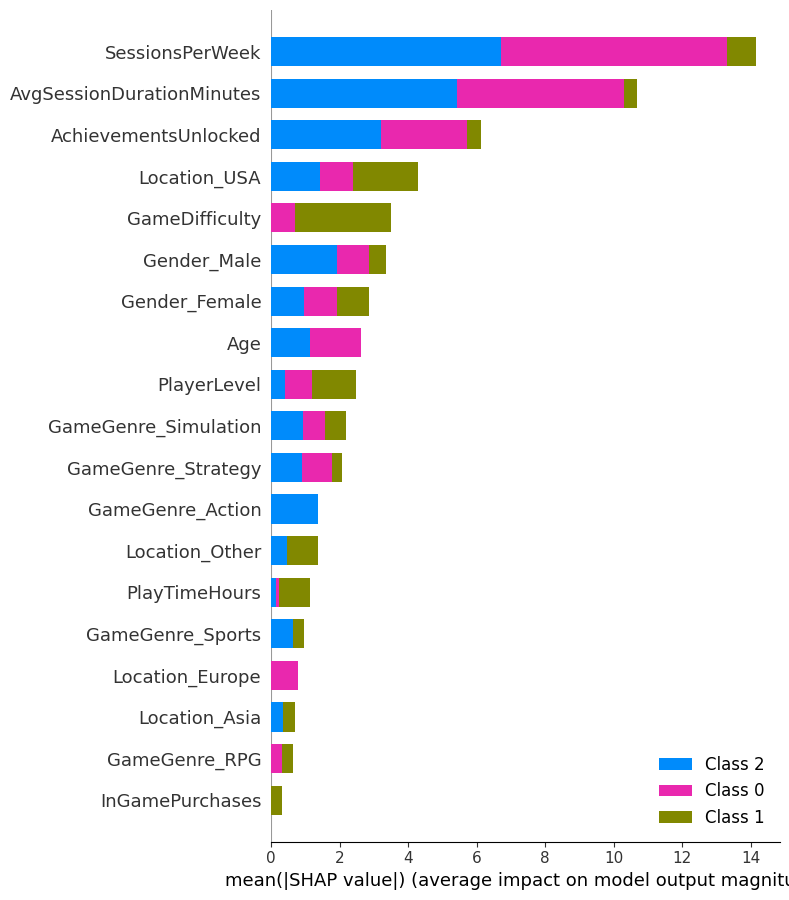

In [23]:
explainer = shap.LinearExplainer(clf, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_train.columns)

In [34]:
shap.force_plot(
    explainer.expected_value[0],
    shap_values[0][0, :],
    X_test.iloc[0, :],
    feature_names=X_train.columns,
)